# STEP 6
## Group 8 - CSE 404

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [4]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [5]:
color_w = ['w']* len(white)
white['color'] = color_w

color_r = ['r']* len(red)
red['color'] = color_r

In [6]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,w


In [7]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [8]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,r


## Initial Split

In [177]:
Y1 = wine['color']
Y2 = wine['quality']
X = wine.drop(['color','quality'], axis = 1) #extract the predictor and target variables 

# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.2, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2, random_state=1)


## Initial SVM

In [24]:
# classify whether wine is red or white

cls1 = SVC().fit(X1_train, Y1_train)
accuracy_train = accuracy_score(Y1_train, cls1.predict(X1_train))
accuracy_test = accuracy_score(Y1_test, cls1.predict(X1_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 93.69%
Test Accuracy: 93.31%


In [25]:
# classify the quality of wine (0-10)

cls2 = SVC().fit(X2_train, Y2_train)
accuracy_train = accuracy_score(Y2_train, cls2.predict(X2_train))
accuracy_test = accuracy_score(Y2_test, cls2.predict(X2_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 44.39%
Test Accuracy: 42.62%


In [ ]:
for i in ["linear", "poly", "rbf", "sigmoid"]:
    svm_c = SVC(kernel = i).fit(X2_train, Y2_train)
    accuracy_train = accuracy_score(Y2_train, svm_c.predict(X2_train))
    accuracy_test = accuracy_score(Y2_test, svm_c.predict(X2_test))
    print(i)
    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%\n'.format(accuracy_test*100))

In [ ]:
C = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_ac = []
for i in C:
    svm_c = SVC(C = i, kernel = "linear").fit(X2_train, Y2_train)
    accuracy_train = accuracy_score(Y2_train, svm_c.predict(X2_train))
    accuracy_test = accuracy_score(Y2_test, svm_c.predict(X2_test))
    print("C = ",i)
    print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
    print('Test Accuracy:{: .2f}%\n'.format(accuracy_test*100))
    test_ac.append(accuracy_test)

In [26]:
confusion_matrix = metrics.confusion_matrix(Y2_test, cls2.predict(X2_test))
confusion_matrix

array([[  0,   0,   1,   3,   0,   0,   0],
       [  0,   0,   0,  44,   0,   0,   0],
       [  0,   0,  21, 413,   0,   0,   0],
       [  0,   0,  13, 533,   0,   0,   0],
       [  0,   0,   1, 226,   0,   0,   0],
       [  0,   0,   1,  43,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

## Initial Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X1_train, Y1_train)

DecisionTreeClassifier(random_state=0)

In [29]:
clf1.score(X1_test, Y1_test)

0.99

In [30]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X2_train, Y2_train)

DecisionTreeClassifier(random_state=0)

In [31]:
clf2.score(X2_test, Y2_test)

0.5969230769230769

Text(0, 0.5, 'Test Accuracy')

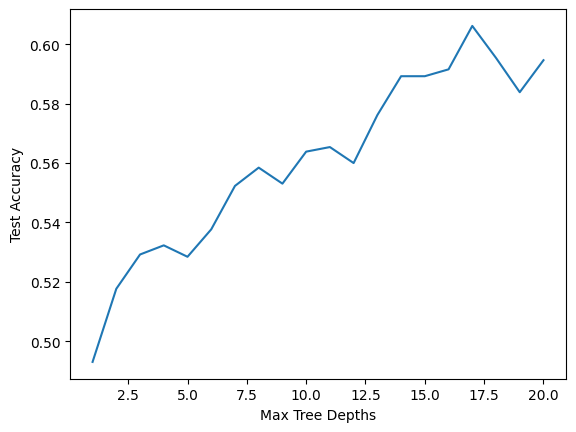

In [32]:
scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf2 = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf2.fit(X2_train, Y2_train)
    scores.append(clf2.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")

## Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [34]:
clf_forest = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest.fit(X1_train, Y1_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [35]:
clf_forest.score(X1_test, Y1_test)

0.9838461538461538

In [36]:
clf_forest2 = RandomForestClassifier(max_depth=10, random_state=0)
clf_forest2.fit(X2_train, Y2_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [37]:
clf_forest2.score(X2_test, Y2_test)

0.6415384615384615

### 10-Fold CV

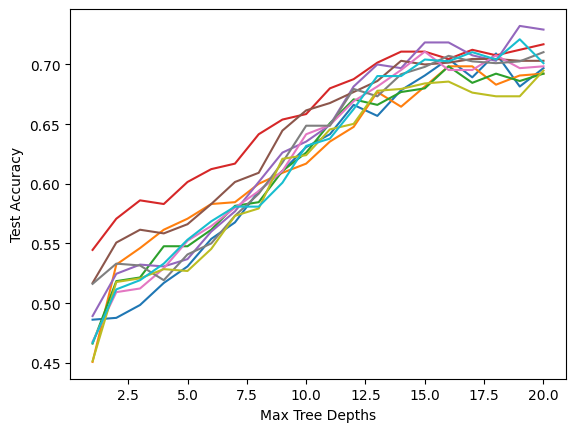

In [148]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X, Y2)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    #print(y2_train.value_counts())
    scores = []
    roc_scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X2_train, y2_train)
        prediction = clf_forest2_res.predict(X2_test)
        scores.append(accuracy_score(y2_test, prediction))

    plt.plot(depths, scores)
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

### Stratified 5-Fold ROC AUC Scores

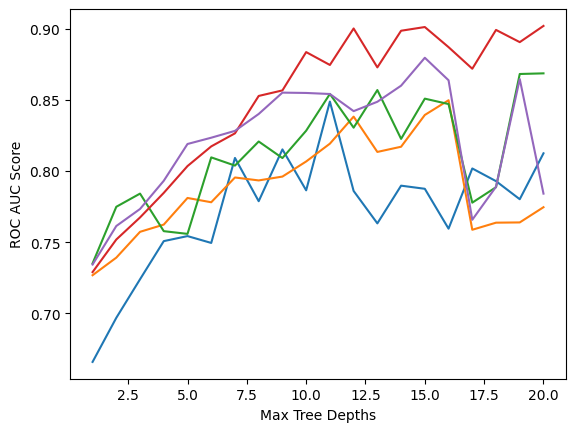

In [150]:
kf = StratifiedKFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X, Y2)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    #print(y2_train.value_counts())
    scores = []
    roc_scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X2_train, y2_train)
        prediction = clf_forest2_res.predict(X2_test)
        scores.append(accuracy_score(y2_test, prediction))
        probabilities = clf_forest2_res.predict_proba(X2_test)
        #print(probabilities)
        #print(y2_test)
        one_hot = pd.get_dummies(y2_test)
#         for i in range(3,10):
#             if i not in one_hot:
#                 one_hot[i] = 0

        roc_scores.append(roc_auc_score(one_hot, probabilities, multi_class='ovr', labels=[i for i in range(3, 10)]))


    plt.plot(depths, roc_scores)
    plt.xlabel("Max Tree Depths")
    plt.ylabel("ROC AUC Score")

## Upsampling

Upsampling will allow us to create artificial or duplicate data points to balance the class label for the wine qualities that are under represented in the training data. We used the quality of 6 as our resampling class to add artificial points to wine qualities 3,4,5,7,8,9. Then we remade our training and testing split data and used that to train our Random Forest Classification. However, this lead to a lower testing accuracy of 29.22%, this could be due to the classifier now underfitting the training data and not capturing that most of the wine fell into the quality of 6.

Total: 6497
quality 1 : 0
quality 2 : 0
quality 3 : 30
quality 4 : 216
quality 5 : 2138
quality 6 : 2836
quality 7 : 1079
quality 8 : 193
quality 9 : 5
quality 10 : 0


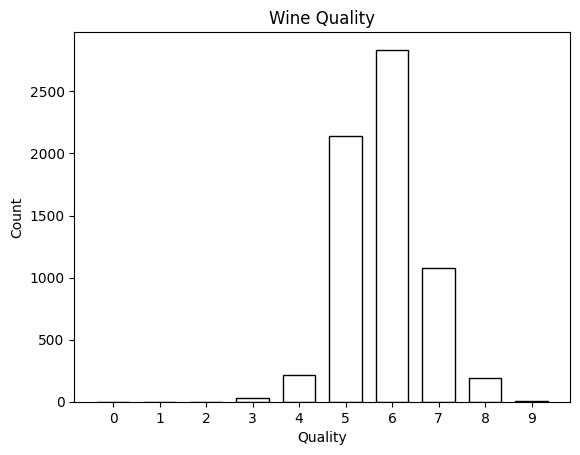

In [39]:
print("Total:",len(wine))

for i in range(1,11):  
    print("quality",i,":",len(wine[wine["quality"] == i]))
    
plt.hist(wine["quality"], range = (0,10), align = 'left', rwidth=0.7, color = "white" ,ec = "black")
plt.title("Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()


In [40]:
from sklearn.utils import resample

In [182]:
X_train_temp = X2_train.copy()
X_train_temp["quality"] = Y2_train
X_train_up = resample(X_train_temp[X_train_temp["quality"] == 6],
             replace=True,
             n_samples=500,
             random_state=42)
for quality in [3, 4, 5, 7, 8, 9]:
    upsample = resample(X_train_temp[X_train_temp["quality"] == quality],
             replace=True,
             n_samples=500,
             random_state=42)
    X_train_up = pd.concat([X_train_up, upsample], ignore_index=True, sort=False)

In [183]:
y2_train_up = X_train_up["quality"]
X_train_up = X_train_up.drop(["quality"], axis=1)

In [184]:
clf_forest2_up = RandomForestClassifier(max_depth=3, random_state=0)
clf_forest2_up.fit(X_train_up, y2_train_up)

RandomForestClassifier(max_depth=3, random_state=0)

In [185]:
clf_forest2_up.score(X2_test, Y2_test)

0.28076923076923077

Initial upsampling led to overfitting and poor performance

## Using SMOTE with Random Forests

SMOTE (Synthetic Minority Oversampling Technique) helps us increase the number of cases in our dataset in a balanced way. This works by generating new instances from existing under represented class cases that we supply as inputs. This is another method for balancing our dataset so that our classifier does not over train on the samples with the quality being 6. After resplitting our data with this technique, the Random Forest Classifier was able to acheive a testing accuracy of 62.60% which is higher than the testing accuracy when using upsampling.

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

In [50]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2, random_state=1)

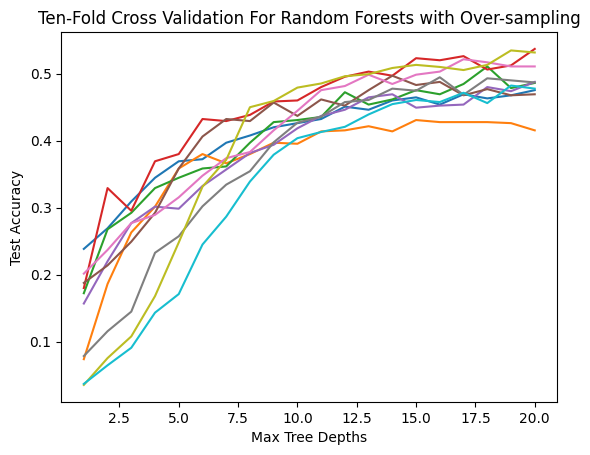

In [36]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    sm = SMOTE(random_state=42,k_neighbors = 3)
    
    X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)
    
    # use random over sampling for 9th class
    if len(indices) > 0:
        X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
             replace=True,
             n_samples=max_sample_size,
             random_state=42)
        
        
        X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
        Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])
    
    scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with Over-sampling")
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

### Looking for optimal KNN size for SMOTE algorithm

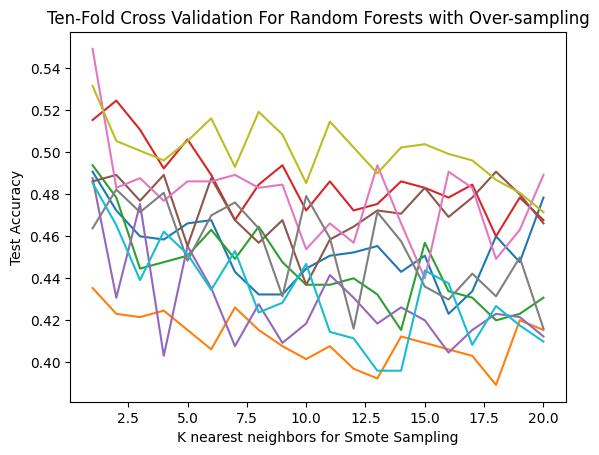

In [99]:
kf = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    
    scores = []
    neighbors = [i for i in range(1,21)]
    for neighbor in neighbors:
        sm = SMOTE(random_state=42,k_neighbors = neighbor)

        X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)

        # use random over sampling for 9th class
        if len(indices) > 0:
            X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
                 replace=True,
                 n_samples=max_sample_size,
                 random_state=42)


            X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
            Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])

        
        clf_forest2_res = RandomForestClassifier(max_depth=13, random_state=0)
        clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with Over-sampling")
    plt.xlabel("K nearest neighbors for Smote Sampling")
    plt.ylabel("Test Accuracy")

### SMOTE with Under-sampling

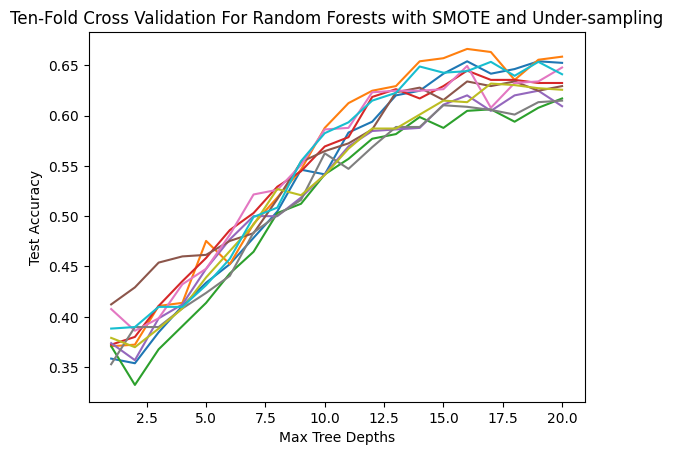

In [188]:
kf = KFold(n_splits=10, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X2_train, X2_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    #print(y2_train.value_counts())
    
    # remove quality 9 class from smote over sampling
    max_sample_size = max(y2_train.value_counts())
    indices = y2_train[y2_train==9].index
    X2_train_9 = X2_train[y2_train==9]
    y2_train_9 = y2_train[y2_train==9]
    
    X2_train = X2_train.drop(indices)
    y2_train = y2_train.drop(indices)
    
    
    indices2 = y2_train[y2_train.isin([5,6])].index
    X2_train_temp = X2_train[y2_train.isin([5,6])]
    y2_train_temp = y2_train[y2_train.isin([5,6])]
    
    #X2_train = X2_train.drop(indices2)
    #y2_train = y2_train.drop(indices2)
    
    smote_strategy = {
        3: 1000,
        4: 1000,
        7: 1000,
        8: 1000
    }
    sm = SMOTE(sampling_strategy=smote_strategy, random_state=42,k_neighbors = 3)
    
    X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, y2_train)
    
    # use random over sampling for 9th class
    if len(indices) > 1:
        #print("adding 9")
        X2_train_9, y2_train_9 = resample(X2_train_9, y2_train_9,
             replace=True,
             n_samples=50,
             random_state=42)
        
        
        X2_train_smote = pd.concat([X2_train_smote, X2_train_9])
        Y2_train_smote = pd.concat([Y2_train_smote, y2_train_9])
    
    undersample_strategy = {
        5: 1500,
        6: 1500
    }
    rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
    X_res, y_res = rus.fit_resample(X2_train_smote, Y2_train_smote)
    
    #X_res = pd.concat([X_res, X2_train_smote])
    #y_res = pd.concat([y_res, Y2_train_smote])
    
    
    #print(y_res.value_counts())
    scores = []
    depths = [i for i in range(1,21)]
    for depth in depths:
        clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
        clf_forest2_res.fit(X_res, y_res)
        scores.append(clf_forest2_res.score(X2_test, y2_test))

    plt.plot(depths, scores)
    plt.title("Ten-Fold Cross Validation For Random Forests with SMOTE and Under-sampling")
    plt.xlabel("Max Tree Depths")
    plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Test Accuracy')

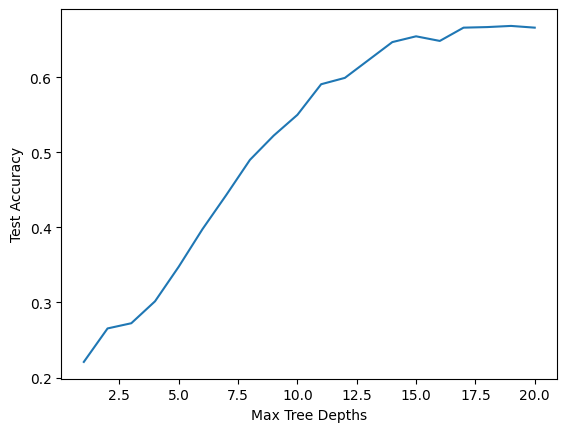

In [48]:
sm = SMOTE(random_state=42,k_neighbors = 1)
X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, Y2_train)

scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
    clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
    scores.append(clf_forest2_res.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")

Text(0, 0.5, 'Test Accuracy')

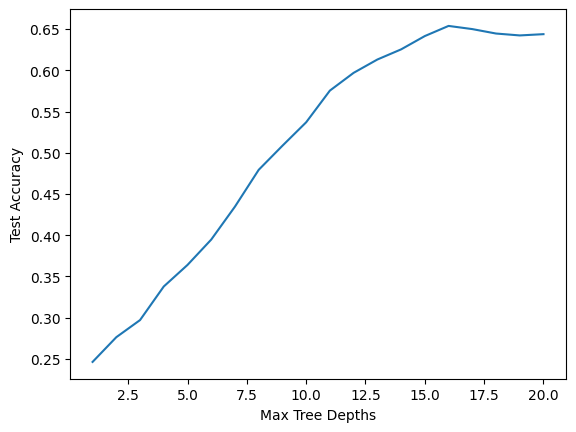

In [53]:
sm = SMOTE(random_state=42,k_neighbors = 3)
X2_train_smote, Y2_train_smote = sm.fit_resample(X2_train, Y2_train)

scores = []
depths = [i for i in range(1,21)]
for depth in depths:
    clf_forest2_res = RandomForestClassifier(max_depth=depth, random_state=0)
    clf_forest2_res.fit(X2_train_smote, Y2_train_smote)
    scores.append(clf_forest2_res.score(X2_test, Y2_test))
    
plt.plot(depths, scores)
plt.xlabel("Max Tree Depths")
plt.ylabel("Test Accuracy")

## PCA

In [189]:
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [191]:
# train one model to learn to classify the color
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.2, random_state=1)

# second model to classify the quality
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size = 0.2, random_state=1)

### PCA with SVM and SMOTE

In [192]:
sm = SMOTE(random_state=42,k_neighbors = 3)
X_res, y_res = sm.fit_resample(X2_train, Y2_train)
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)

In [193]:
train_labels = y_res.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_labels = Y2_test.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_vectors = X2_test
train_vectors = X_res
train_labels.value_counts()

mid     6870
high    4580
low     4580
Name: quality, dtype: int64

In [194]:
n_components = 1

pca = PCA(n_components= n_components, whiten=True)

_ = pca.fit(train_vectors)

pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)
total_variance = np.sum(pca.explained_variance_ratio_)
param_grid = {'C' : [1],
                'gamma': [1e-06],
                'kernel': ['linear']}
clf = GridSearchCV(SVC(), param_grid, cv = 5, n_jobs = -1)
clf = clf.fit(pca_train_vectors, train_labels)
pred_labels = clf.predict(pca_test_vectors)
acc_score = accuracy_score(test_labels, pred_labels)
print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        45
         low       0.00      0.00      0.00        48
         mid       0.93      1.00      0.96      1207

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.86      0.93      0.89      1300

[[   0    0   45]
 [   0    0   48]
 [   0    0 1207]]


C:\Users\Aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aidan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1318: Unde

<AxesSubplot:>

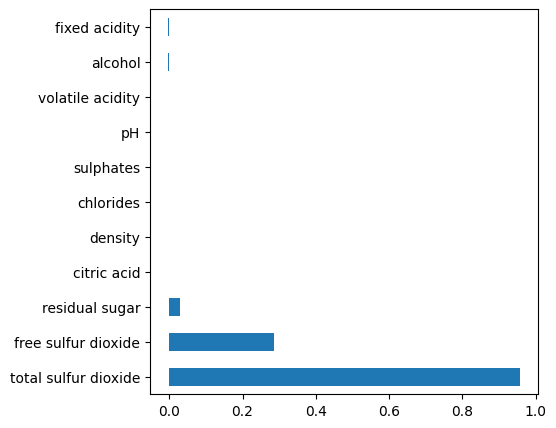

In [195]:
pcs = (pca.components_[0]).tolist()
feat_importances = pd.Series(pcs, index=X_res.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(5,5))

In [196]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    param_grid = {'C' : [1],
                  'gamma': [1e-6],
                  'kernel': ['linear']}
    clf = GridSearchCV(SVC(), param_grid, cv = 5, n_jobs = -1)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

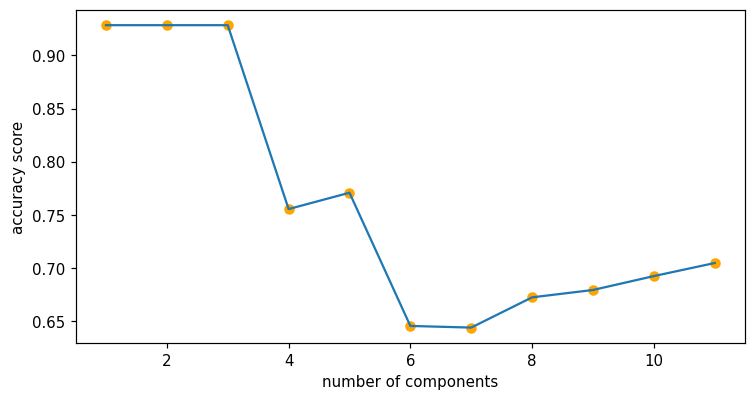

In [197]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')

### PCA with Random Forest and SMOTE

In [198]:
X_res, y_res = sm.fit_resample(X2_train, Y2_train)
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)

In [199]:
train_labels = y_res.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_labels = Y2_test.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_vectors = X2_test
train_vectors = X_res
train_labels.value_counts()

mid     6870
high    4580
low     4580
Name: quality, dtype: int64

In [200]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    clf = RandomForestClassifier(max_depth=15, random_state=0)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

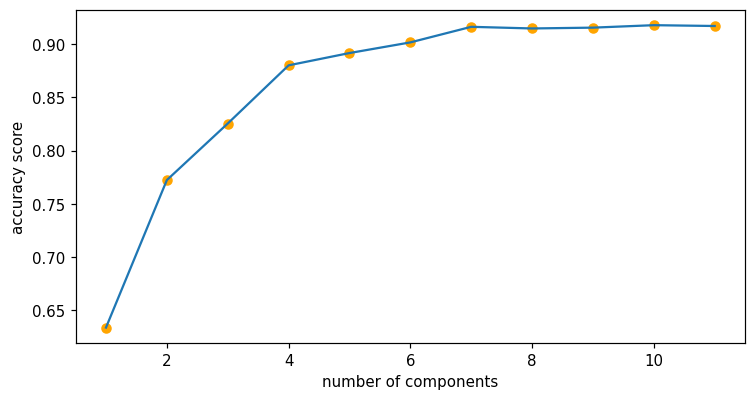

In [201]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')

### PCA with Decision Trees and SMOTE

In [202]:
X_res, y_res = sm.fit_resample(X2_train, Y2_train)
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(X_res), columns=X_res.columns, index=X_res.index)

In [203]:
train_labels = y_res.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_labels = Y2_test.replace({3 : "low", 4 : "low", 5 : "mid", 6 : "mid", 7 : "mid", 8 : "high", 9 : "high"})
test_vectors = X2_test
train_vectors = X_res
train_labels.value_counts()

mid     6870
high    4580
low     4580
Name: quality, dtype: int64

In [204]:
def PCA_feature_finder(x):
    n_components = x

    pca = PCA(n_components= n_components, whiten=True)

    _ = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance = np.sum(pca.explained_variance_ratio_)
    clf = DecisionTreeClassifier(random_state=0)
    clf = clf.fit(pca_train_vectors, train_labels)
    pred_labels = clf.predict(pca_test_vectors)
    acc_score = accuracy_score(test_labels, pred_labels)
    return acc_score, total_variance

Text(0, 0.5, 'accuracy score')

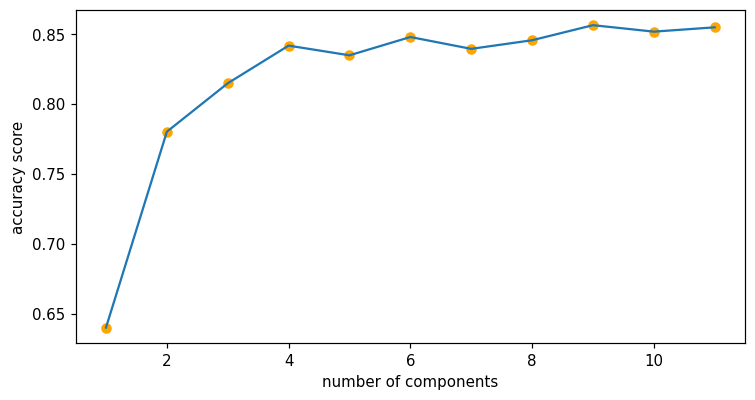

In [205]:
accuracy_scores = []
for x in range(1,12):
    accuracy_scores.append(PCA_feature_finder(x)[0])
dpi = 108  
plt.rcParams['figure.dpi'] = dpi
plt.figure(figsize = (8,4))
plt.plot(range(1,12), accuracy_scores)
plt.scatter(range(1,12), accuracy_scores, color = 'orange')
plt.xlabel('number of components')
plt.ylabel('accuracy score')

In [206]:
print(accuracy_scores)

[0.64, 0.78, 0.8146153846153846, 0.8415384615384616, 0.8346153846153846, 0.8476923076923077, 0.8392307692307692, 0.8453846153846154, 0.8561538461538462, 0.8515384615384616, 0.8546153846153847]


## PyTorch

In [207]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, TensorDataset, random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [208]:
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')
wine = pd.concat([white, red], ignore_index=True, sort=False)
wine.shape

(6497, 12)

In [209]:
input_cols=list(wine.columns)[:-1]
output_cols = ['quality']

In [210]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    df = wine.copy(deep=True)
    inputs_array = df[input_cols].to_numpy()
    targets_array = df[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(wine)

In [211]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
dataset = TensorDataset(inputs, targets)

In [212]:
train_ds, val_ds = random_split(dataset, [5198, 1299])
batch_size=50
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
input_size = len(input_cols)
output_size = len(output_cols)

nn.Linear applies a linear transformation to the input data, using adjusted weights and bias. Forward feeds the input of first layer to the second layer. The training and validation step both add a loss function from 1L_loss to get the Mean Absolute Loss between the model output and the target output.

In [213]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size) 
        
    def forward(self, xb): 
        out = self.linear(xb)                         
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)          
        # using L1 loss function that is Mean absolute error between output and target
        loss = F.l1_loss(out,targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        # using L1 loss function that is Mean absolute error between output and target
        loss = F.l1_loss(out,targets)                              
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [214]:
model=WineQuality()

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation 
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [215]:
epochs = 6497
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [100], val_loss: 2.7167
Epoch [200], val_loss: 2.4542
Epoch [300], val_loss: 2.2041
Epoch [400], val_loss: 1.9665
Epoch [500], val_loss: 1.7409
Epoch [600], val_loss: 1.5328
Epoch [700], val_loss: 1.3453
Epoch [800], val_loss: 1.1843
Epoch [900], val_loss: 1.0541
Epoch [1000], val_loss: 0.9552
Epoch [1100], val_loss: 0.8883
Epoch [1200], val_loss: 0.8468
Epoch [1300], val_loss: 0.8211
Epoch [1400], val_loss: 0.8060
Epoch [1500], val_loss: 0.7965
Epoch [1600], val_loss: 0.7893
Epoch [1700], val_loss: 0.7834
Epoch [1800], val_loss: 0.7785
Epoch [1900], val_loss: 0.7744
Epoch [2000], val_loss: 0.7706
Epoch [2100], val_loss: 0.7670
Epoch [2200], val_loss: 0.7635
Epoch [2300], val_loss: 0.7602
Epoch [2400], val_loss: 0.7568
Epoch [2500], val_loss: 0.7535
Epoch [2600], val_loss: 0.7506
Epoch [2700], val_loss: 0.7473
Epoch [2800], val_loss: 0.7444
Epoch [2900], val_loss: 0.7413
Epoch [3000], val_loss: 0.7384
Epoch [3100], val_loss: 0.7356
Epoch [3200], val_loss: 0.7327
Epoch [3300], val

In [216]:
error = []
error_dict = {1.0:[],2.0:[],3.0:[],4.0:[],5.0:[],6.0:[],7.0:[],8.0:[],9.0:[]}
for i,t in val_ds:
    inputs = i.unsqueeze(0)
    predictions = model(inputs)
    pred = predictions[0].detach()
    error.append(t-pred)
    if t.item() in error_dict:
        error_dict[t.item()].append(error)
mean_error = torch.mean(torch.stack(error))
mean_error

tensor(0.0448)